In [1]:
print("ready")


[1] "ready"


In [2]:
#I did not include HMB181_2 in EMMAX, took out in the prep_EMMAX step ...
####load stuff###
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")
source("/share/hennlab/vault/people/shyamie/methylation/scripts/methylation_age_functions.R")
load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")
load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")

Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker

sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value < .05/n)
}

process_string <- function(string) {
    cpg_ <- strsplit(string, split = "_")[[1]][2]
    cpg_ <- strsplit(cpg_, split = ".txt")[[1]]
    return(cpg_)
}
ls()

[1] "age.estimates"          "Baka"                   "Baka_pheno"            
 [4] "Baka_t"                 "beta.baka.blood"        "beta.matrix.baka"      
 [7] "beta.matrix.ks"         "bh.p.thresholds"        "full.probe.info"       
[10] "Himba_merged"           "Himba_merged_t"         "Himba_pheno_merged"    
[13] "Horvath"                "Horvath_sites"          "KHS_merged"            
[16] "KHS_merged_t"           "KHS_pheno_merged"       "lit_sites"             
[19] "MAF05_SNP_baka.probes"  "MAF05_SNP_himba.probes" "MAF05_SNP_KHS.probes"  
[22] "manhattan.plot"         "pc.biplot"              "pca.scores.blood"      
[25] "pca.scores.saliva"      "probe.info"             "process_string"        
[28] "qq.plot"                "scatterplot"            "scree.plot"            
[31] "sig_sites"              "test.baka"              "test.emmax.baka.blood" 
[34] "test.emmax.ks"          "variables.baka"         "variables.baka.blood"  
[37] "variables.ks"

In [3]:
##number meqtls
all_meqtls <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_meqtls.txt", sep=",", header=FALSE)
KHS_meqtls <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_meqtls.txt", sep=",", header=FALSE)
Baka_meqtls<- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_meqtls.txt", sep=",", header=FALSE)
Himba_meqtls <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_meqtls.txt", sep=",", header=FALSE)

KHS_meqtls$V1 <- as.character(KHS_meqtls$V1)
Baka_meqtls$V1 <- as.character(Baka_meqtls$V1)
Himba_meqtls$V1 <- as.character(Himba_meqtls$V1)
all_meqtls$V1 <- as.character(all_meqtls$V1)
all_meqtls$cpg <- sapply(all_meqtls$V1, process_string)
KHS_meqtls$cpg <- sapply(KHS_meqtls$V1, process_string)
Baka_meqtls$cpg <- sapply(Baka_meqtls$V1, process_string)
Himba_meqtls$cpg <- sapply(Himba_meqtls$V1, process_string)


for (pop in c("all", "KHS", "Himba", "Baka")){
    meqtls <- get(paste0(pop, "_meqtls"))
    unique_cpgs <- unique(meqtls$cpg)
    assign(paste0(pop, "_meqtl_cpgs"), unique_cpgs)
    print(paste0("number of unique cpgs in ", pop, " combined meqtls ", length(unique(meqtls$V1))))
    print(paste0("total number of ", pop," combined meqtls ", nrow(meqtls)))
    print(paste0("number of horvath sites that are ", pop, " meqtls: ", length(Horvath_sites[Horvath_sites %in% unique_cpgs])))
    cat("\n")
    
}


paste0("Proportion KHS meqtl cpgs in combined meqtl cpgs: ", length(KHS_meqtl_cpgs[KHS_meqtl_cpgs %in% all_meqtl_cpgs])/length(KHS_meqtl_cpgs))

paste0("Proportion Baka meqtl cpgs in combined meqtl cpgs: ", length(Baka_meqtl_cpgs[Baka_meqtl_cpgs %in% all_meqtl_cpgs])/length(Baka_meqtl_cpgs))

paste0("Proportion Himba meqtl cpgs in combined meqtl cpgs: ", length(Himba_meqtl_cpgs[Himba_meqtl_cpgs %in% all_meqtl_cpgs])/length(Himba_meqtl_cpgs))

#any pop-specific
pop_spec_meqtl_cpgs <- unique(c(unique(c(KHS_meqtl_cpgs, Baka_meqtl_cpgs)), Himba_meqtl_cpgs))
head(pop_spec_meqtl_cpgs)                             
paste("# meqtl cpgs in any pop specific run: ", length(pop_spec_meqtl_cpgs))
meqtl_in_any_pop_or_combined <- unique(c(pop_spec_meqtl_cpgs, all_meqtl_cpgs))

print(paste0("number of horvath sites that are meqtls in any of the pop specific runs: ", length(Horvath_sites[Horvath_sites %in% pop_spec_meqtl_cpgs])))

print(paste0("number of horvath sites that are meqtls in any of the pop specific or combined runs: ", length(meqtl_in_any_pop_or_combined)))

#save(list = c("KHS_meqtl_cpgs", "Baka_meqtl_cpgs", "Himba_meqtl_cpgs", "all_meqtl_cpgs","pop_spec_meqtl_cpgs", "meqtl_in_any_pop_or_combined"), file = "/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")


[1] "number of unique cpgs in all combined meqtls 61407"
[1] "total number of all combined meqtls 118374"
[1] "number of horvath sites that are all meqtls: 61"

[1] "number of unique cpgs in KHS combined meqtls 46441"
[1] "total number of KHS combined meqtls 75120"
[1] "number of horvath sites that are KHS meqtls: 42"

[1] "number of unique cpgs in Himba combined meqtls 83527"
[1] "total number of Himba combined meqtls 198775"
[1] "number of horvath sites that are Himba meqtls: 29"

[1] "number of unique cpgs in Baka combined meqtls 32167"
[1] "total number of Baka combined meqtls 61525"
[1] "number of horvath sites that are Baka meqtls: 32"



[1] "Proportion KHS meqtl cpgs in combined meqtl cpgs: 0.383518873409272"

[1] "Proportion Baka meqtl cpgs in combined meqtl cpgs: 0.382441632729195"

[1] "Proportion Himba meqtl cpgs in combined meqtl cpgs: 0.155362936535492"

[1] "cg00001364" "cg00001593" "cg00001930" "cg00002406" "cg00002660"
[6] "cg00003173"

[1] "# meqtl cpgs in any pop specific run:  143550"

[1] "number of horvath sites that are meqtls in any of the pop specific runs: 88"
[1] "number of horvath sites that are meqtls in any of the pop specific or combined runs: 173700"


In [26]:
##meQTL cpg upset plot
library(UpSetR)
library(grid)
cpg_lists <- list(
  Khomani = KHS_meqtl_cpgs,
  Baka = Baka_meqtl_cpgs,
  Himba = Himba_meqtl_cpgs
  #All = all_meqtl_cpgs
)
options(repr.plot.width = 20, repr.plot.height = 7)

# Convert the list to a data frame suitable for UpSetR
cpg_df <- fromList(cpg_lists)
upset_plot <- upset(cpg_df, 
                    sets = c("Khomani", "Baka", "Himba"), 
                    order.by = "freq", 
                    keep.order = TRUE,
                    mainbar.y.label = "Number of cis-meQTL CpGs",
                     text.scale = c(3, 3, 3, 1.5, 3, 3))


# Save the UpSet plot as an image
png("upset_plot.png", width = 1500, height = 600)
upset_plot
dev.off()

# Read the image back in as a grob
upset_plot <- rasterGrob(png::readPNG("upset_plot.png"), interpolate = TRUE)
upset_plot 

save(upset_plot, file ="meQTL_cpgs.RData")

png 
  2

rastergrob[GRID.rastergrob.1570] 

In [5]:
# library(VennDiagram)
# library(gridExtra)
# options(repr.plot.width = 30, repr.plot.height = 6)
# library(grid)
# svg("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/meqtl_cpgs.svg", width = 30, height = 6)

# ###Overlap of meqtl cpgs
# list_of_vectors <- list(KHS_meqtl_cpgs, Baka_meqtl_cpgs, Himba_meqtl_cpgs)

# venn.plot1 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Khomani", "Baka", "Himba"),
#   filename = NULL,
#   margin = 0.1,
#   cex = 2.0,
#   cat.cex = 2.0
# )

# list_of_vectors <- list(KHS_meqtl_cpgs, all_meqtl_cpgs)

# venn.plot2 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Khomani", "Merged"),
#   filename = NULL,
#   margin = 0.1,
#   cex = 2.0,
#   cat.cex = 2.0
# )

# list_of_vectors <- list(Baka_meqtl_cpgs, all_meqtl_cpgs)

# venn.plot3 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Baka", "Merged"),
#   filename = NULL,
#   margin = 0.1,
#   cex = 2.0,
#   cat.cex = 2.0
# )

# list_of_vectors <- list(Himba_meqtl_cpgs, all_meqtl_cpgs)

# venn.plot4 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Himba", "Merged"),
#   filename = NULL,
#   margin = 0.1,
#   cex = 2.0,
#   cat.cex = 2.0
# )

# list_of_vectors <- list(pop_spec_meqtl_cpgs, all_meqtl_cpgs)

# venn.plot5 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Any African", "Merged"),
#   filename = NULL,
#   margin = 0.1,
#   cex = 2.0,
#   cat.cex = 2.0
# )

# pushViewport(viewport(layout = grid.layout(1, 30))) # Adjust layout to add space between plots

# pushViewport(viewport(layout.pos.col = 1:5))
# grid.draw(venn.plot1)
# upViewport()

# pushViewport(viewport(layout.pos.col = 6:11))
# grid.draw(venn.plot2)
# upViewport()

# pushViewport(viewport(layout.pos.col = 12:17))
# grid.draw(venn.plot3)
# upViewport()

# pushViewport(viewport(layout.pos.col = 18:23))
# grid.draw(venn.plot4)
# upViewport()

# pushViewport(viewport(layout.pos.col = 24:29))
# grid.draw(venn.plot5)
# upViewport()

# popViewport()
# dev.off()

In [6]:
###combined EWAS###
options(repr.plot.width = 7, repr.plot.height = 7)

all_emmax_no_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_no_meqtl_regressed.ps", header=FALSE)
colnames(all_emmax_no_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_no_regress$CPG.Labels <- as.character(all_emmax_no_regress$CPG.Labels)
all_sig <- sig_sites(all_emmax_no_regress)

print(paste0("number of combined EWAS sig hits: ", nrow(all_sig)))
cat(paste("number of literature sites:",length(lit_sites))) 
cat("\n")
overlap.site <- intersect(all_sig$CPG.Labels, lit_sites)
cat(paste("number of overlapping literature with combined sig saliva sites:", length(overlap.site))) 
cat("\n")
overlap.site <- intersect(all_sig$CPG.Labels, Horvath_sites)
cat(paste("number  overlapping Horvath:", length(overlap.site))) 
cat("\n")
# Bocklandt_sites <- as.vector(Bocklandt.Saliva.2011$TargetID)
# cat(paste("number of sites from the only previous saliva study (Bocklandt 2011):", length(Bocklandt_sites)))
# cat("\n")
# cat(paste0("number overlapping Bocklandt:", nrow(all_sig[all_sig$CPG.Labels %in% Bocklandt_sites,])))
# cat("\n")

[1] "number of combined EWAS sig hits: 4201"
number of literature sites: 24487
number of overlapping literature with combined sig saliva sites: 1981
number  overlapping Horvath: 51


[1] "# of Himba sig: 347"

[1] "# of KHS sig: 149"

[1] "# of Baka sig: 282"

number in all three:  31number of overlapping literature with combined sig saliva sites: 470


[1] "# age sites in any of the 3 pops: 657"

[1] "Baka rank in % of p-values of combined EWAS signifciant sites, not sig in Baka run"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.07059  0.56823  1.65855  6.53265  5.20663 99.60738 

[1] "Himba rank in % of  p-values of combined EWAS signifciant sites, not sig in Himba run"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.04876  0.44895  1.07794  2.59085  2.81295 82.72065 

[1] "KHS rank in % of p-values of combined EWAS signifciant sites, not sig in KHS run"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.03607  0.48969  1.98314  8.33343  8.57872 98.19434 

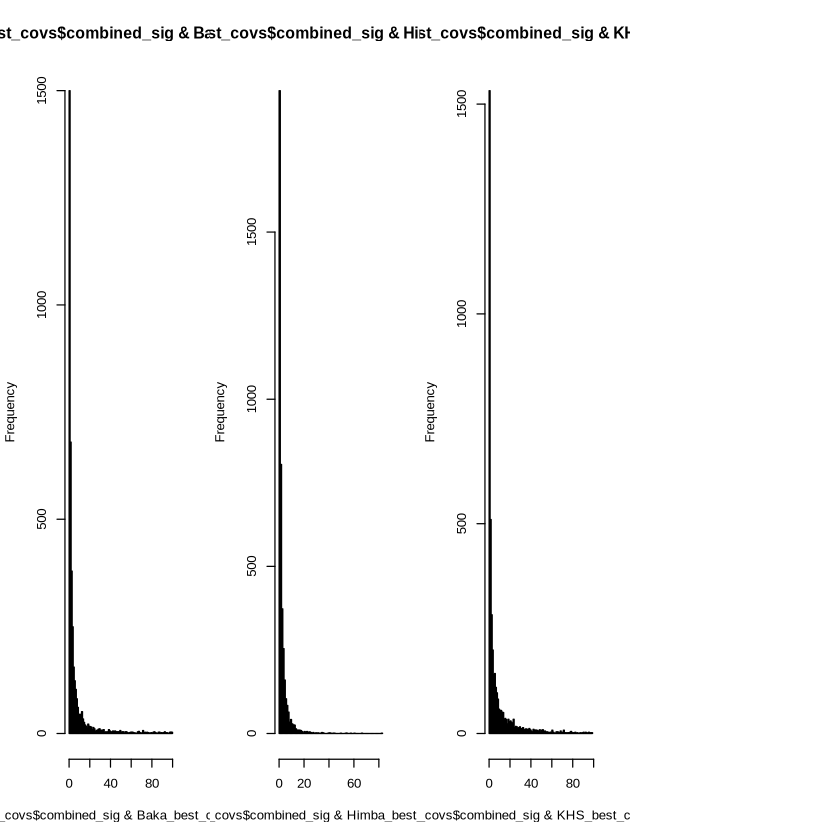

In [7]:
###pop-specific EWAS###
###Load not meqtl regressed results (including NAs)

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")

Baka_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_no_meqtl_regress.ps", header=FALSE)

KHS_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)

Himba_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)

KHS_best_covs$V1 <- as.character(KHS_best_covs$V1)
Baka_best_covs$V1 <- as.character(Baka_best_covs$V1)
Himba_best_covs$V1 <- as.character(Himba_best_covs$V1)

colnames(Baka_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs)<-c("CPG.Labels","V2","P.value")
Himba_sig <- sig_sites(Himba_best_covs)
paste0("# of Himba sig: ", nrow(Himba_sig))
KHS_sig <- sig_sites(KHS_best_covs)
paste0("# of KHS sig: ", nrow(KHS_sig))
Baka_sig <- sig_sites(Baka_best_covs)
paste0("# of Baka sig: ", nrow(Baka_sig))
pop_spec_age_cpgs <- unique(c(unique(c(KHS_sig$CPG.Labels, Baka_sig$CPG.Labels)), Himba_sig$CPG.Labels))
cat(paste("number in all three: ", length(intersect(intersect(KHS_sig$CPG.Labels, Baka_sig$CPG.Labels), Himba_sig$CPG.Labels))))
overlap.site <- intersect(pop_spec_age_cpgs, lit_sites)

cat(paste("number of overlapping literature with combined sig saliva sites:", length(overlap.site))) 
cat("\n")
paste0("# age sites in any of the 3 pops: ", length(pop_spec_age_cpgs))

par(mfrow = c(1, 4))


all_emmax_no_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_no_meqtl_regressed.ps", header=FALSE)
colnames(all_emmax_no_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_no_regress$CPG.Labels <- as.character(all_emmax_no_regress$CPG.Labels)
all_sig <- sig_sites(all_emmax_no_regress)

Himba_best_covs$CPG.Labels <- as.character(Himba_best_covs$CPG.Labels)
KHS_best_covs$CPG.Labels <- as.character(KHS_best_covs$CPG.Labels)
Baka_best_covs$CPG.Labels <- as.character(Baka_best_covs$CPG.Labels)

rownames(Himba_best_covs) <- Himba_best_covs$CPG.Labels
rownames(KHS_best_covs) <- KHS_best_covs$CPG.Labels
rownames(Baka_best_covs) <- Baka_best_covs$CPG.Labels

Himba_best_covs <- Himba_best_covs[order(Himba_best_covs$P.value),]
KHS_best_covs <- KHS_best_covs[order(KHS_best_covs$P.value),]
Baka_best_covs <- Baka_best_covs[order(Baka_best_covs$P.value),]


########checking that combined hits are still low p-value hits in pop-specific runs
Himba_rank <- seq(1, nrow(Himba_best_covs), by = 1)
Himba_best_covs$rank <- Himba_rank/nrow(Himba_best_covs) *100

Baka_rank <- seq(1, nrow(Baka_best_covs), by = 1)
Baka_best_covs$rank <- Baka_rank/nrow(Baka_best_covs) *100

KHS_rank <- seq(1, nrow(KHS_best_covs), by = 1)
KHS_best_covs$rank <- KHS_rank/nrow(KHS_best_covs) *100

Baka_best_covs$combined_sig <- rownames(Baka_best_covs) %in% all_sig$CPG.Labels
Himba_best_covs$combined_sig <- rownames(Himba_best_covs) %in% all_sig$CPG.Labels
KHS_best_covs$combined_sig <- rownames(KHS_best_covs) %in% all_sig$CPG.Labels

Baka_sign <- 0.05 / nrow(Baka_best_covs)
KHS_sign <- 0.05 / nrow(KHS_best_covs)
Himba_sign <- 0.05 / nrow(Himba_best_covs)


print("Baka rank in % of p-values of combined EWAS signifciant sites, not sig in Baka run")
summary(Baka_best_covs[Baka_best_covs$combined_sig & Baka_best_covs$P.value > Baka_sign, "rank"])
print("Himba rank in % of  p-values of combined EWAS signifciant sites, not sig in Himba run")
summary(Himba_best_covs[Himba_best_covs$combined_sig & Himba_best_covs$P.value > Himba_sign, "rank"])
print("KHS rank in % of p-values of combined EWAS signifciant sites, not sig in KHS run")
summary(KHS_best_covs[KHS_best_covs$combined_sig & KHS_best_covs$P.value > KHS_sign, "rank"])

hist(Baka_best_covs[Baka_best_covs$combined_sig & Baka_best_covs$P.value > Baka_sign, "rank"], breaks=100)
hist(Himba_best_covs[Himba_best_covs$combined_sig & Himba_best_covs$P.value > Himba_sign, "rank"], breaks=100)
hist(KHS_best_covs[KHS_best_covs$combined_sig & KHS_best_covs$P.value > KHS_sign, "rank"], breaks=100)

#look at correlation of effect sizes for overlapping sig hit

#library(data.table)
#df1 <- as.data.table(Baka_sig); df2 <- as.data.table(KHS_sig)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("Baka (x) vs KHS (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))


#df1 <- as.data.table(Baka_sig); df2 <- as.data.table(Himba_sig)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("Baka (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))


#df1 <- as.data.table(KHS_sig); df2 <- as.data.table(Himba_sig)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))

#outlier is cg12943155
#Himba_sig[Himba_sig$V2 == max(Himba_sig$V2),]
# Baka_sig[Baka_sig$CPG.Labels == "cg12943155",]
# KHS_sig[KHS_sig$CPG.Labels == "cg12943155",]
# Himba_sig[Himba_sig$CPG.Labels == "cg16867657",]
#take out the outlier
#df1 <- as.data.table(KHS_sig); df2 <- as.data.table(Himba_sig)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#merge <- merge[!merge$CPG.Labels == "cg12943155"]
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))
#outlier is cg12943155
# Himba_sig[Himba_sig$V2 == max(Himba_sig$V2),]
# Baka_sig[Baka_sig$CPG.Labels == "cg12943155",]
# KHS_sig[KHS_sig$CPG.Labels == "cg12943155",]




Warning message in geom_text(aes(label = paste("Khomani vs Baka:", sprintf("Correlation: %.2f, Slope: %.2f", :
"All aesthetics have length 1, but the data has 355103 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(label = paste("Khomani vs Himba:", sprintf("Correlation: %.2f, Slope: %.2f", :
"All aesthetics have length 1, but the data has 355103 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(label = paste("Baka vs Himba:", sprintf("Correlation: %.2f, Slope: %.2f", :
"All aesthetics have length 1, but the data has 355103 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


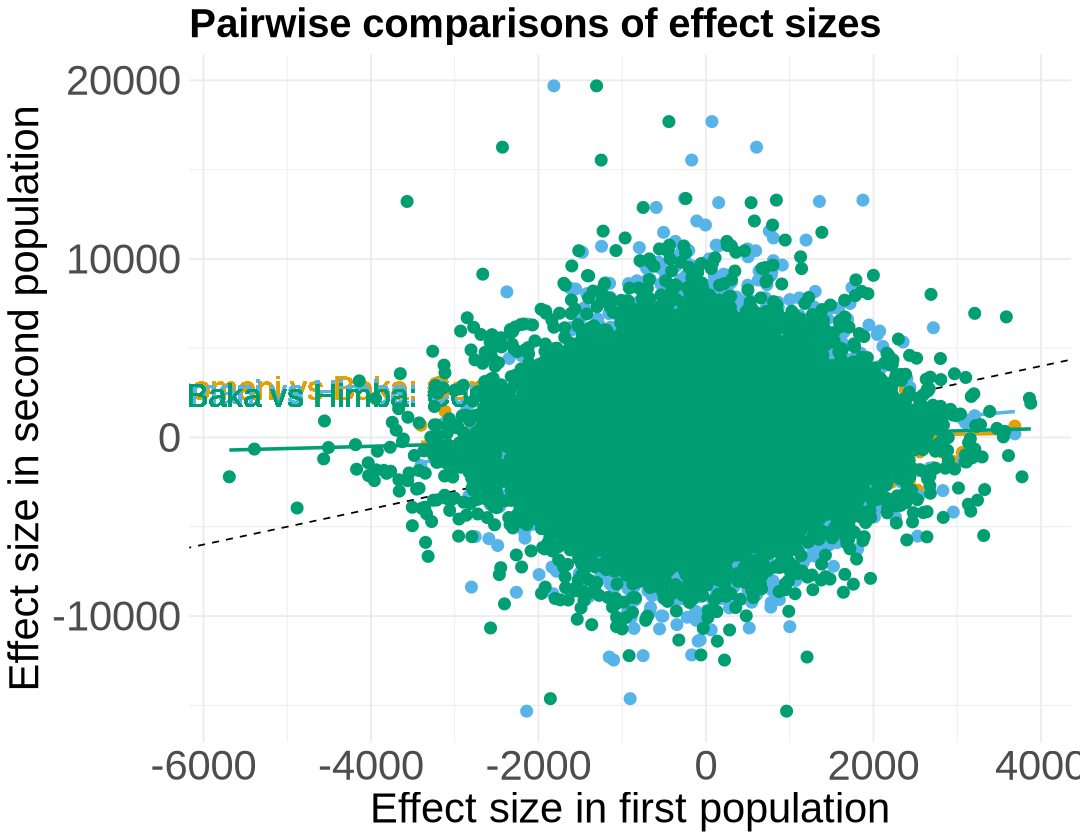

In [8]:
options(repr.plot.width = 9, repr.plot.height = 7)
library(ggplot2)
# Extract unique CPG labels from each dataset
KHS_ <- KHS_sig$CPG.Labels
Baka_ <- Baka_sig$CPG.Labels
Himba_ <- Himba_sig$CPG.Labels

KHS_ <- KHS_best_covs$CPG.Labels
Baka_ <- Baka_best_covs$CPG.Labels
Himba_ <- Himba_best_covs$CPG.Labels


# Combine unique labels
at_least_one <- unique(c(unique(KHS_), Baka_, Himba_))

# Filter CPG labels present in all three datasets
at_least_one <- at_least_one[at_least_one %in% KHS_best_covs$CPG.Labels]
at_least_one <- at_least_one[at_least_one %in% Himba_best_covs$CPG.Labels]
at_least_one <- at_least_one[at_least_one %in% Baka_best_covs$CPG.Labels]


# Subset datasets using filtered CPG labels
KHS_eff <- KHS_best_covs[KHS_best_covs$CPG.Labels %in% at_least_one, ]
Baka_eff <- Baka_best_covs[Baka_best_covs$CPG.Labels %in% at_least_one, ]
Himba_eff <- Himba_best_covs[Himba_best_covs$CPG.Labels %in% at_least_one, ]

KHS_eff <- KHS_eff[c(at_least_one), ]
Baka_eff <- Baka_eff[c(at_least_one), ]
Himba_eff <- Himba_eff[c(at_least_one), ]


KHS_V2 <- KHS_eff$V2
Baka_V2 <- Baka_eff$V2
Himba_V2 <- Himba_eff$V2

# Combine the 'V2' columns into a new data frame
combined_V2 <- data.frame(KHS_V2, Baka_V2, Himba_V2)

KHS_Himba_cor <- cor(combined_V2$KHS_V2, combined_V2$Himba_V2)
KHS_Baka_cor <- cor(combined_V2$KHS_V2, combined_V2$Baka_V2)
Himba_Baka_cor <- cor(combined_V2$Himba_V2, combined_V2$Baka_V2)

# Create pairwise plots using ggplot2
pairwise_plot <- ggplot(combined_V2, aes(x = KHS_V2, y = Baka_V2)) +
  geom_point(color = "#E69F00", size = 3) +  # Orange color for better visibility
  geom_smooth(method = "lm", se = FALSE, color = "#E69F00") +  # Orange color for consistency
  geom_text(aes(label = paste("Khomani vs Baka:", sprintf("Correlation: %.2f, Slope: %.2f", KHS_Baka_cor, coef(lm(Baka_V2 ~ KHS_V2))[[2]])), x = 1700, y = 3400), hjust = 1, vjust = 1, size = 7, color = "#E69F00") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black") +  # Add one-to-one line
  labs(x = "KHS V2", y = "Baka V2") +
  ggtitle("Pairwise comparisons of effect sizes")
  

# Add plots for Himba vs KHS and Himba vs Baka
pairwise_plot <- pairwise_plot + 
  geom_point(aes(x = KHS_V2, y = Himba_V2), color = "#56B4E9", size = 3) +  # Blue color for better visibility
  geom_smooth(aes(x = KHS_V2, y = Himba_V2), method = "lm", se = FALSE, color = "#56B4E9") +  # Blue color for consistency
  geom_text(aes(label = paste("Khomani vs Himba:", sprintf("Correlation: %.2f, Slope: %.2f", KHS_Himba_cor, coef(lm(Himba_V2 ~ KHS_V2))[[2]])), x = 1700, y = 3200), hjust = 1, vjust = 1, size = 7, color = "#56B4E9") +
  geom_point(aes(x = Baka_V2, y = Himba_V2), color = "#009E73", size = 3) +  # Green color for better visibility
  geom_smooth(aes(x = Baka_V2, y = Himba_V2), method = "lm", se = FALSE, color = "#009E73") +  # Green color for consistency
  geom_text(aes(label = paste("Baka vs Himba:", sprintf("Correlation: %.2f, Slope: %.2f", Himba_Baka_cor, coef(lm(Himba_V2 ~ Baka_V2))[[2]])), x = 1700, y = 3000), hjust = 1, vjust = 1, size = 7, color = "#009E73") +
  labs(x = "Effect size in first population", y = "Effect size in second population") + 
    theme_minimal() + theme(plot.title = element_text(size = 24, face = "bold"),
        axis.title = element_text(size = 25),
        axis.text = element_text(size = 25))
  
# Print the plot
#svg("correlation_effect_sizes.svg")  #separate panels
print(pairwise_plot)
#dev.off()

In [9]:
KHS_Himba_cor
KHS_Baka_cor
Himba_Baka_cor

[1] 0.1277869

[1] 0.05272051

[1] 0.05257728

In [24]:
##Age cpg upset plot

library(UpSetR)
library(grid)
cpg_lists <- list(
  Khomani = KHS_sig$CPG.Labels,
  Baka = Baka_sig$CPG.Labels,
  Himba = Himba_sig$CPG.Labels
  #All = all_sig$CPG.Labels
)
options(repr.plot.width = 20, repr.plot.height = 7)

# Convert the list to a data frame suitable for UpSetR
cpg_df <- fromList(cpg_lists)
upset_plot <- upset(cpg_df, 
                    sets = c("Khomani", "Baka", "Himba"), 
                    order.by = "freq", 
                    keep.order = TRUE,
                     mainbar.y.label = "Number of age-associated CpGs",
                    text.scale = c(3, 3, 3, 1.5, 3, 3))


library(cowplot)
library(gridExtra)
library(grid)


# Save the UpSet plot as an image
png("upset_plot.png", width = 1500, height = 600)
upset_plot
dev.off()

# Read the image back in as a grob
upset_plot <- rasterGrob(png::readPNG("upset_plot.png"), interpolate = TRUE)


# Combine the UpSet plot image and the ggplot
#grid.arrange(upset_img, ggplotGrob(ggplot_plot), ncol = 1)


save(upset_plot, file="age_cpgs.RData")

png 
  2

In [ ]:

# options(repr.plot.width = 15, repr.plot.height = 3)
# library(grid)

# list_of_vectors <- list(KHS_sig$CPG.Labels, Baka_sig$CPG.Labels, Himba_sig$CPG.Labels)

# venn.plot1 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("KHS age cpgs", "Baka age cpgs", "Himba age cpgs"),
#   filename = NULL,
#   margin = 0.1
# )


# list_of_vectors <- list(KHS_sig$CPG.Labels, all_sig$CPG.Labels)

# venn.plot2 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("KHS age cpgs", "combined age cpgs"),
#   filename = NULL,
#   margin = 0.1
# )

# list_of_vectors <- list(Baka_sig$CPG.Labels, all_sig$CPG.Labels)

# venn.plot3 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Baka age cpgs", "combined age cpgs"),
#   filename = NULL,
#   margin = 0.1
# )

# list_of_vectors <- list(Himba_sig$CPG.Labels, all_sig$CPG.Labels)

# venn.plot4 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("Himba age cpgs", "combined age cpgs"),
#   filename = NULL,
#   margin = 0.1
# )

# list_of_vectors <- list(pop_spec_age_cpgs, all_sig$CPG.Labels)

# venn.plot5 <- venn.diagram(
#   x = list_of_vectors,
#   category.names = c("pop specific age cpgs", "combined age cpgs"),
#   filename = NULL,
#   margin = 0.1
# )


# pushViewport(viewport(layout = grid.layout(1, 5)))

# pushViewport(viewport(layout.pos.col = 1))
# grid.draw(venn.plot1)
# upViewport()

# pushViewport(viewport(layout.pos.col = 2))
# grid.draw(venn.plot2)
# upViewport()

# pushViewport(viewport(layout.pos.col = 3))
# grid.draw(venn.plot3)
# upViewport()

# pushViewport(viewport(layout.pos.col = 4))
# grid.draw(venn.plot4)
# upViewport()


# pushViewport(viewport(layout.pos.col = 5))
# grid.draw(venn.plot5)
# upViewport()

# popViewport()

In [12]:
#####load meqtl regressed EMMAX results####
options(repr.plot.width = 8, repr.plot.height = 8)

Baka_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_meqtl_regressed.ps", header=FALSE)

KHS_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)

Himba_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)


KHS_best_covs_reg$V1 <- as.character(KHS_best_covs_reg$V1)
Baka_best_covs_reg$V1 <- as.character(Baka_best_covs_reg$V1)
Himba_best_covs_reg$V1 <- as.character(Himba_best_covs_reg$V1)

colnames(Baka_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs_reg)<-c("CPG.Labels","V2","P.value")

Himba_best_covs_reg$CPG.Labels <- as.character(Himba_best_covs_reg$CPG.Labels)
KHS_best_covs_reg$CPG.Labels <- as.character(KHS_best_covs_reg$CPG.Labels)
Baka_best_covs_reg$CPG.Labels <- as.character(Baka_best_covs_reg$CPG.Labels)


Himba_sig_reg <- sig_sites(Himba_best_covs_reg)
paste0("# of Himba sig meqtl regressed: ", nrow(Himba_sig_reg))
KHS_sig_reg <- sig_sites(KHS_best_covs_reg)
paste0("# of KHS sig meqtl regressed: ", nrow(KHS_sig_reg))
Baka_sig_reg <- sig_sites(Baka_best_covs_reg)
paste0("# of Baka sig meqtl regressed: ", nrow(Baka_sig_reg))

pop_spec_age_cpgs_reg <- unique(c(unique(c(KHS_sig_reg$CPG.Labels, Baka_sig_reg$CPG.Labels)), Himba_sig_reg$CPG.Labels))
paste0("# meqtl regressed age sites in any of the 3 pops: ", length(pop_spec_age_cpgs_reg))

paste0("# meqtl in any of pops from original that stay significant: ", length(pop_spec_age_cpgs_reg[pop_spec_age_cpgs_reg %in% pop_spec_age_cpgs]))


#df1 <- as.data.table(Baka_sig_reg); df2 <- as.data.table(KHS_sig_reg)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("Baka (x) vs KHS (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))

#df1 <- as.data.table(Baka_sig_reg); df2 <- as.data.table(Himba_sig_reg)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("Baka (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))

#df1 <- as.data.table(KHS_sig_reg); df2 <- as.data.table(Himba_sig_reg)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))

##outlier is cg12943155
#df1 <- as.data.table(KHS_sig_reg); df2 <- as.data.table(Himba_sig_reg)
#setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
#merge <- df1[df2]
#merge <- na.omit(merge)
#merge <- merge[!merge$CPG.Labels == "cg12943155"]
#cor <- cor(merge$V2, merge$i.V2)
#plot(merge$V2, merge$i.V2)
#title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))


[1] "# of Himba sig meqtl regressed: 405"

[1] "# of KHS sig meqtl regressed: 164"

[1] "# of Baka sig meqtl regressed: 312"

[1] "# meqtl regressed age sites in any of the 3 pops: 751"

[1] "# meqtl in any of pops from original that stay significant: 655"

In [13]:
###combined EWAS meqtl regressed ### 

all_emmax_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_meqtl_regressed.ps", header=FALSE)
colnames(all_emmax_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_regress$CPG.Labels <- as.character(all_emmax_regress$CPG.Labels)
head(all_emmax_regress)
all_reg_sig <- sig_sites(all_emmax_regress)

print(paste0("number of combined EWAS sig hits: ", nrow(all_reg_sig)))
cat(paste("number of literature sites:",length(lit_sites))) 
cat("\n")
overlap.site <- intersect(all_reg_sig$CPG.Labels, lit_sites)
cat(paste("number of overlapping literature with combined sig saliva sites:", length(overlap.site))) 
cat("\n")
overlap.site <- intersect(all_reg_sig$CPG.Labels, Horvath_sites)
cat(paste("number  overlapping Horvath:", length(overlap.site))) 
cat("\n")


,CPG.Labels,V2,P.value
,<chr>,<dbl>,<dbl>
1,cg27666123,-532.79087,6.145490e-03
2,cg27666046,-188.58515,1.479182e-07
3,cg27665985,-170.54646,1.017916e-03
4,cg27665925,-12.99822,9.734818e-01
5,cg27665860,-23.50354,8.265513e-01
6,cg27665829,130.32429,3.401515e-01


[1] "number of combined EWAS sig hits: 4366"
number of literature sites: 24487
number of overlapping literature with combined sig saliva sites: 2037
number  overlapping Horvath: 52


In [14]:
#####load FUSION regressed EMMAX results####
options(repr.plot.width = 10, repr.plot.height = 10)

Baka_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_fusion_regressed.ps", header=FALSE)

KHS_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)

Himba_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)


KHS_best_covs_reg$V1 <- as.character(KHS_best_covs_reg$V1)
Baka_best_covs_reg$V1 <- as.character(Baka_best_covs_reg$V1)
Himba_best_covs_reg$V1 <- as.character(Himba_best_covs_reg$V1)

colnames(Baka_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs_reg)<-c("CPG.Labels","V2","P.value")

Himba_best_covs_reg$CPG.Labels <- as.character(Himba_best_covs_reg$CPG.Labels)
KHS_best_covs_reg$CPG.Labels <- as.character(KHS_best_covs_reg$CPG.Labels)
Baka_best_covs_reg$CPG.Labels <- as.character(Baka_best_covs_reg$CPG.Labels)


Himba_sig_reg <- sig_sites(Himba_best_covs_reg)
paste0("# of Himba sig meqtl regressed: ", nrow(Himba_sig_reg))
KHS_sig_reg <- sig_sites(KHS_best_covs_reg)
paste0("# of KHS sig meqtl regressed: ", nrow(KHS_sig_reg))
Baka_sig_reg <- sig_sites(Baka_best_covs_reg)
paste0("# of Baka sig meqtl regressed: ", nrow(Baka_sig_reg))

pop_spec_age_cpgs_reg <- unique(c(unique(c(KHS_sig_reg$CPG.Labels, Baka_sig_reg$CPG.Labels)), Himba_sig_reg$CPG.Labels))
paste0("# meqtl regressed age sites in any of the 3 pops: ", length(pop_spec_age_cpgs_reg))

# df1 <- as.data.table(Baka_sig_reg); df2 <- as.data.table(KHS_sig_reg)
# setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
# merge <- df1[df2]
# merge <- na.omit(merge)
# cor <- cor(merge$V2, merge$i.V2)
# plot(merge$V2, merge$i.V2)
# title(main =paste("Baka (x) vs KHS (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))



# df1 <- as.data.table(Baka_sig_reg); df2 <- as.data.table(Himba_sig_reg)
# setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
# merge <- df1[df2]
# merge <- na.omit(merge)
# cor <- cor(merge$V2, merge$i.V2)
# plot(merge$V2, merge$i.V2)
# title(main =paste("Baka (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))


# df1 <- as.data.table(KHS_sig_reg); df2 <- as.data.table(Himba_sig_reg)
# setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
# merge <- df1[df2]
# merge <- na.omit(merge)
# cor <- cor(merge$V2, merge$i.V2)
# plot(merge$V2, merge$i.V2)
# title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))

# #outlier is cg12943155
# df1 <- as.data.table(KHS_sig_reg); df2 <- as.data.table(Himba_sig_reg)
# setkey(df1, CPG.Labels); setkey(df2, CPG.Labels)
# merge <- df1[df2]
# merge <- na.omit(merge)
# merge <- merge[!merge$CPG.Labels == "cg12943155"]
# cor <- cor(merge$V2, merge$i.V2)
# plot(merge$V2, merge$i.V2)
# title(main =paste("KHS (x) vs Himba (y). Corr=", round(cor,2), "number overlap:", nrow(merge)))


[1] "# of Himba sig meqtl regressed: 338"

[1] "# of KHS sig meqtl regressed: 145"

[1] "# of Baka sig meqtl regressed: 275"

[1] "# meqtl regressed age sites in any of the 3 pops: 643"

,CPG.Labels,V2,P.value
,<chr>,<dbl>,<dbl>
1,cg27666123,-532.790870,6.145490e-03
2,cg27666046,-188.585151,1.479182e-07
3,cg27665985,-170.546461,1.017916e-03
4,cg27665925,-12.998225,9.734818e-01
5,cg27665860,3.191998,9.751389e-01
6,cg27665829,130.324291,3.401515e-01


[1] "number of combined EWAS sig hits: 4240"
number of literature sites: 24487
number of overlapping literature with combined sig saliva sites: 1956
number  overlapping Horvath: 51


[1] 4049

[1] 4075

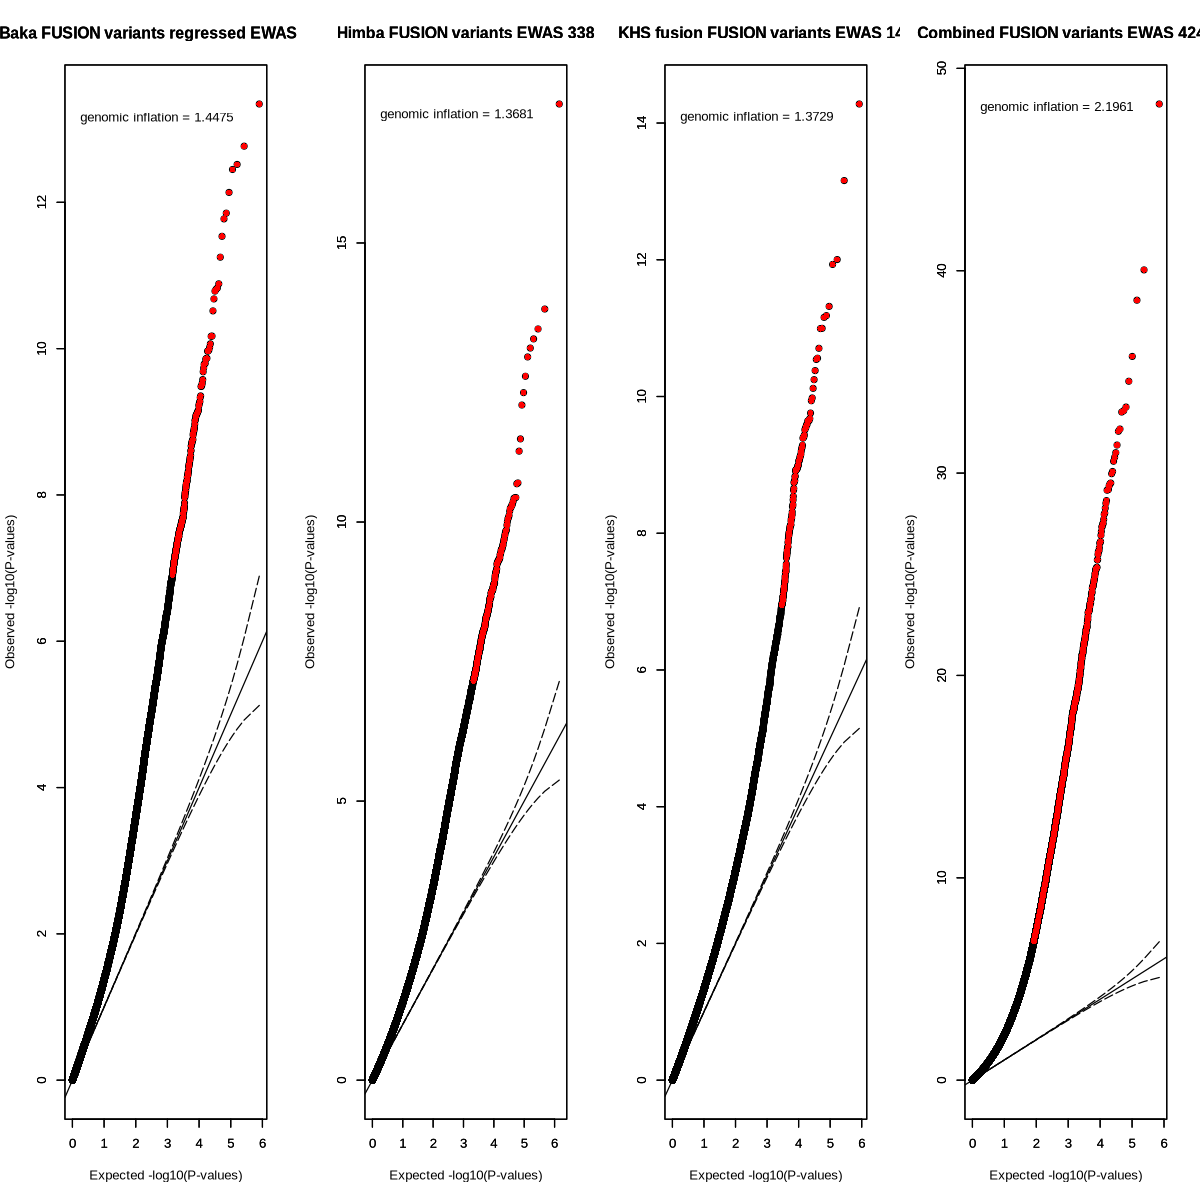

In [15]:
###combined EWAS FUSION regressed ### 


all_emmax_fusion_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_fusion_regressed.ps", header=FALSE)
colnames(all_emmax_fusion_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_fusion_regress$CPG.Labels <- as.character(all_emmax_fusion_regress$CPG.Labels)
head(all_emmax_fusion_regress)
all_fusion_reg_sig <- sig_sites(all_emmax_fusion_regress)

par(mfrow = c(1, 4))
qq.plot(Baka_best_covs_reg$P.value, main = paste('Baka FUSION variants regressed EWAS ',  nrow(Baka_sig_reg))) 
qq.plot(Himba_best_covs_reg$P.value, main = paste('Himba FUSION variants EWAS',  nrow(Himba_sig_reg))) 
qq.plot(KHS_best_covs_reg$P.value, main = paste('KHS fusion FUSION variants EWAS',  nrow(KHS_sig_reg))) 
qq.plot(all_emmax_fusion_regress$P.value, main = paste('Combined FUSION variants EWAS',  nrow(all_fusion_reg_sig))) 

print(paste0("number of combined EWAS sig hits: ", nrow(all_fusion_reg_sig)))
cat(paste("number of literature sites:",length(lit_sites))) 
cat("\n")
overlap.site <- intersect(all_fusion_reg_sig$CPG.Labels, lit_sites)
cat(paste("number of overlapping literature with combined sig saliva sites:", length(overlap.site))) 
cat("\n")
overlap.site <- intersect(all_fusion_reg_sig$CPG.Labels, Horvath_sites)
cat(paste("number  overlapping Horvath:", length(overlap.site))) 
cat("\n")


##overlap of combined no regress EWAS with fusion regressed combined EWAS and with meqtl regressed combined EWAS
length(all_fusion_reg_sig$CPG.Labels[all_fusion_reg_sig$CPG.Labels %in% all_sig$CPG.Labels])

length(all_fusion_reg_sig$CPG.Labels[all_fusion_reg_sig$CPG.Labels %in% all_reg_sig$CPG.Labels])

##look at meqtl plots of sites only in regressed combined and not in normal EWAS combined and vice versa

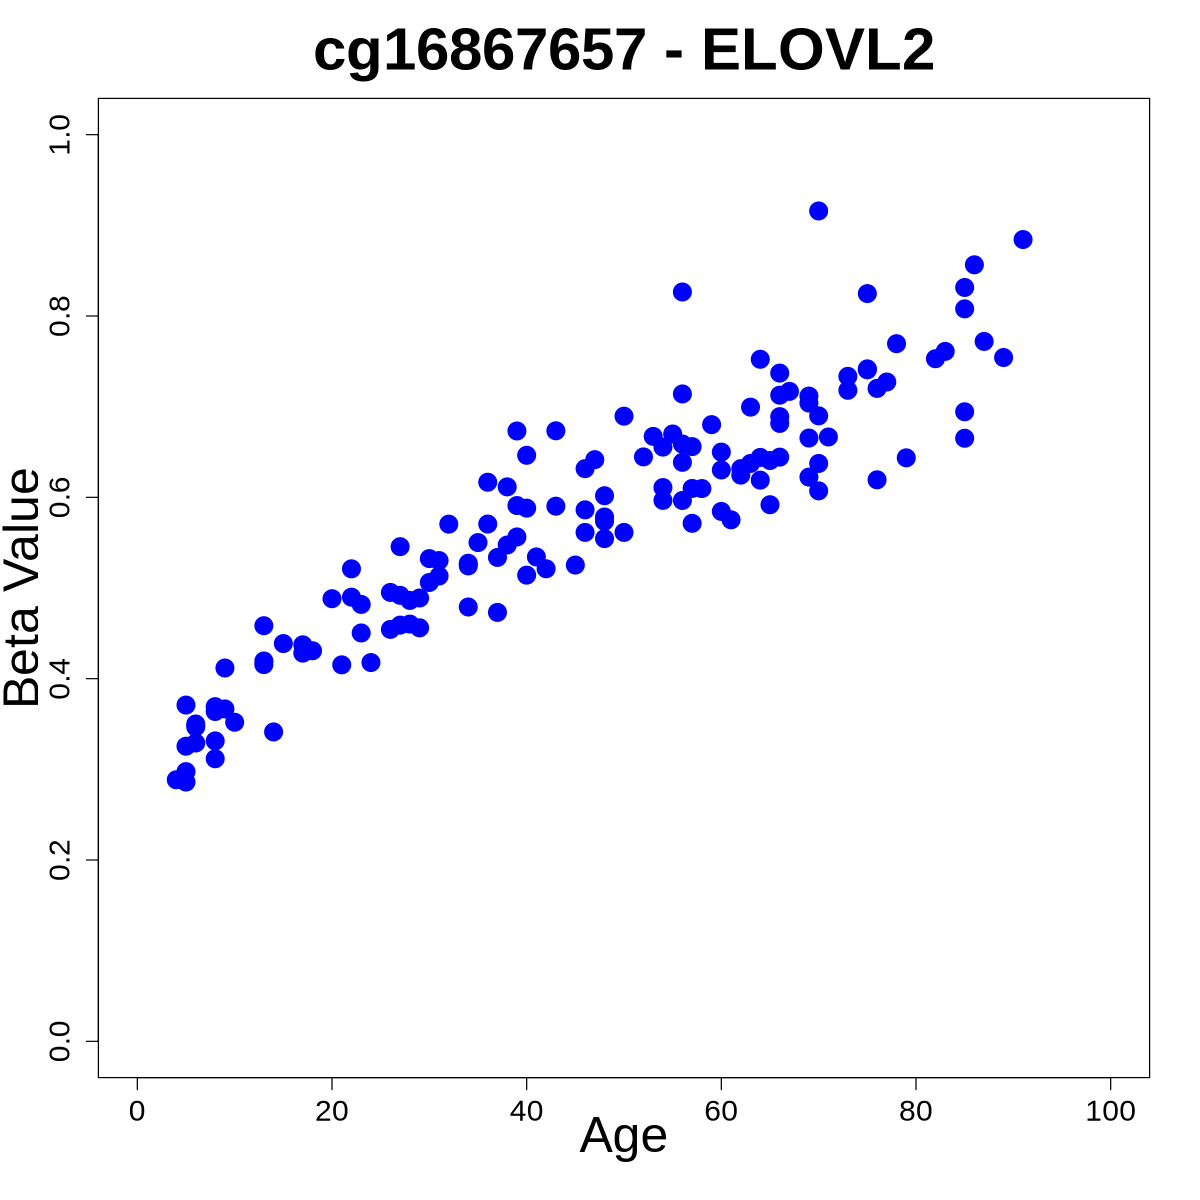

In [16]:
####PLOTTING
options(repr.plot.width = 10, repr.plot.height = 10)

Baka_sig <- Baka_sig[order(Baka_sig$P.value),]
KHS_sig <- KHS_sig[order(KHS_sig$P.value),]
Himba_sig <- Himba_sig[order(Himba_sig$P.value),]
all_three <- intersect(intersect(KHS_sig$CPG.Labels, Baka_sig$CPG.Labels), Himba_sig$CPG.Labels)

# Baka_sig_reg <- Baka_sig_reg [order(Baka_sig_reg $P.value),]
# KHS_sig_reg <- KHS_sig_reg[order(KHS_sig_reg $P.value),]
# Himba_sig_reg <- Himba_sig_reg[order(Himba_sig_reg$P.value),]
# all_meqtl_three <- intersect(intersect(KHS_sig_reg$CPG.Labels, Baka_sig_reg$CPG.Labels), Himba_sig_reg$CPG.Labels)

#scatterplots of top sites that are common across groups normal pop-specifc ewas

#Figure 1 
#svg("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/all_three_sites.svg")
target.site <- all_three
#target.site_meqtl <- all_meqtl_three

#same ID order
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)
#pdf("Common_age_sites_31.pdf")
#dev.new(width = 8, height = 6) 
target.site <- "cg16867657"
for (i in target.site) {
    #for (i in target.site_meqtl) {

    
     plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
         ylim=c(0,1), xlim=c(0,100), col="blue", xlab=NA, ylab=NA, axes=F, cex=1.7)
    par(new=T)
    plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
         ylim=c(0,1), xlim=c(0,100), col="blue", xlab=NA, ylab=NA, axes=F, cex=1.7)
    par(new=T)
    plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3, pch=19,
         ylim=c(0,1), xlim=c(0,100), col="blue", xlab=NA, ylab=NA, axes=F, cex=1.7)
    box()
    axis(side=1, cex.axis=1.5)  # Increase font size of x-axis ticks
    axis(side=2, cex.axis=1.5)  # Increase font size of y-axis ticks
    mtext("Age", side=1, line=2.3, cex=2.5)
    mtext("Beta Value", side=2, line=2.3, cex=2.5)
    mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
          side=3, line=1, cex=3.0, font=2)
      #if (match(i, target.site)%% 9 == 1) {
        # points(c(5, 5, 5), c(0.95, 0.83, .69), pch=19 , col="blue", cex=2)
        # text(6, 0.95, "Baka saliva", cex=1.0, pos=4)
        # text(6, 0.82, "Khomani San saliva", cex=1.0, pos=4)
        # text(6, 0.69, "Himba saliva", cex=1.0, pos=4)
      #}
    }
#dev.off()

png 
  2

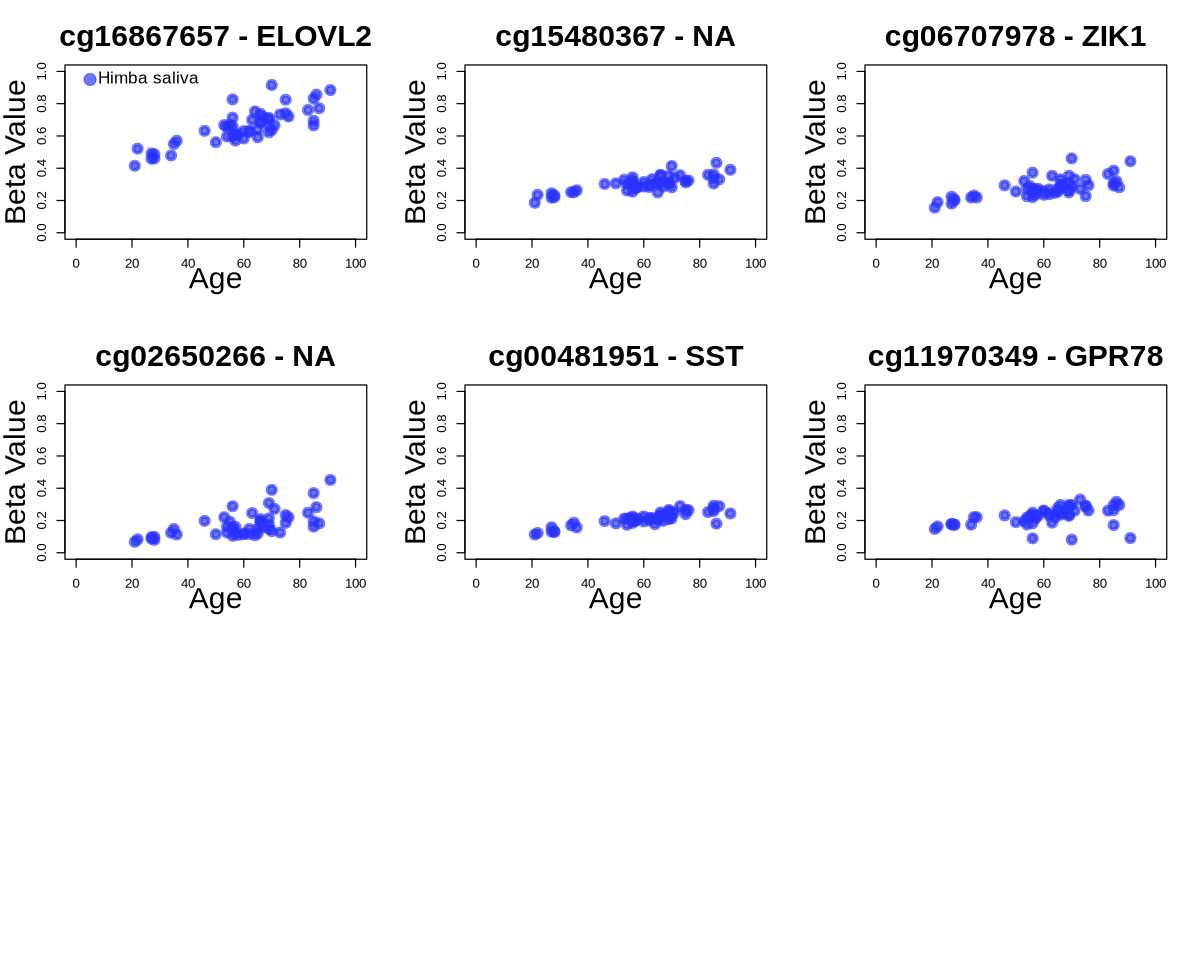

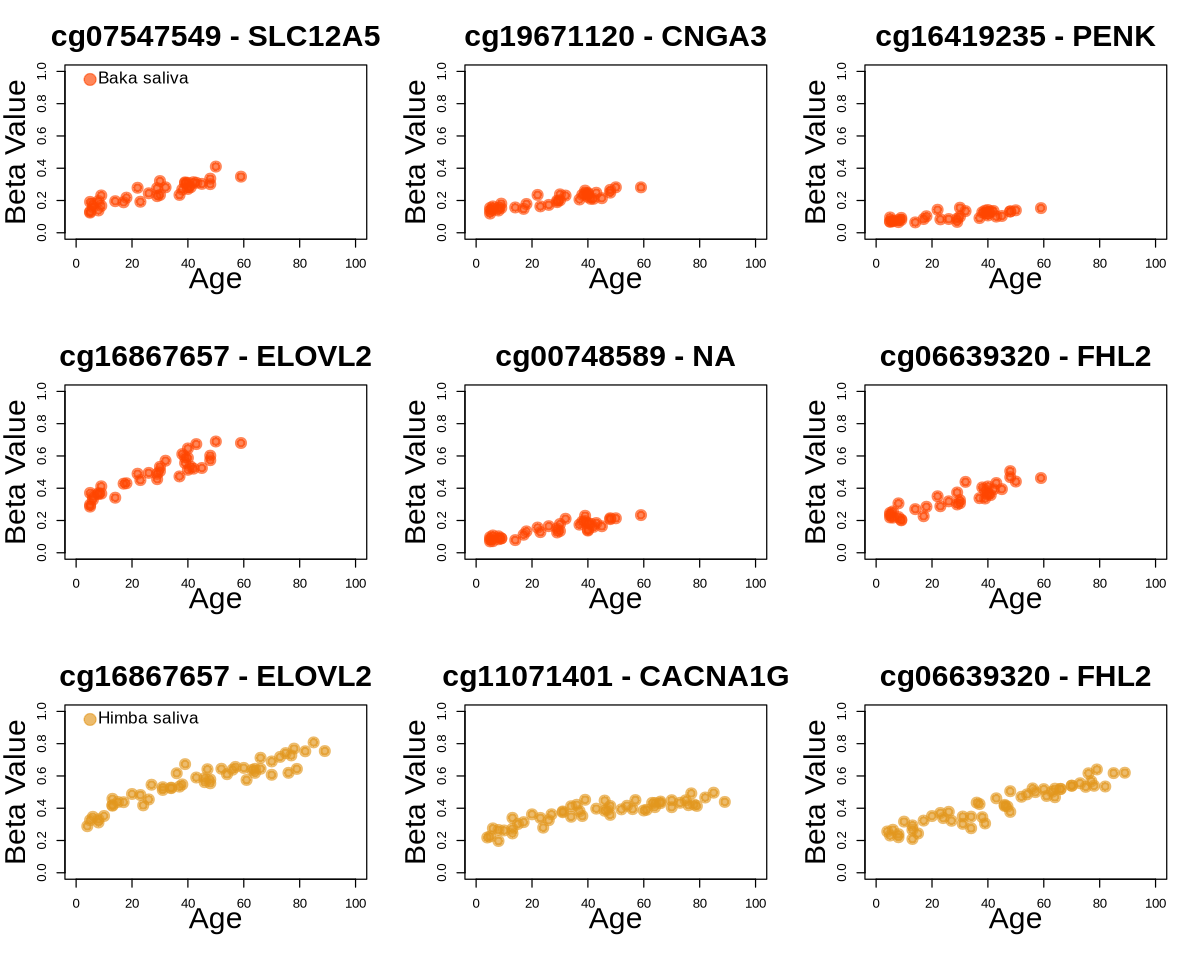

In [17]:
###Plot the top pop-specific sites
svg("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/best_pop_sites.svg")

options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(3,3))
target.site <- KHS_sig[order(KHS_sig$P.value),"CPG.Labels"]
for (i in head(target.site, 3)) {
      plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.0, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=ks.col, cex=2)
        text(5, 0.95, "Khomani San saliva", cex=1.3, pos=4)
      }
    }


target.site <- Baka_sig[order(Baka_sig$P.value),"CPG.Labels"]
for (i in head(target.site, 3)) {
      plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.0, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=baka.col, cex=2)
        text(5, 0.95, "Khomani San saliva", cex=1.3, pos=4)
      }
    }

target.site <- Himba_sig[order(Himba_sig$P.value),"CPG.Labels"]

for (i in head(target.site, 3)) {
      plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.0, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=himba.col, cex=2)
        text(5, 0.95, "Baka saliva", cex=1.3, pos=4)
      }
    }
dev.off()
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(3,3))

target.site <- KHS_sig_reg[order(KHS_sig_reg$P.value),"CPG.Labels"]

for (i in head(target.site, 6)) {
      plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.5, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=c(ks.col), cex=2)
        text(5, 0.95, "Himba saliva", cex=1.3, pos=4)
      }
    }



options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(3,3))
target.site <- Baka_sig_reg[order(Baka_sig_reg$P.value),"CPG.Labels"]

for (i in head(target.site, 6)) {
      plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.5, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=c(baka.col), cex=2)
        text(5, 0.95, "Baka saliva", cex=1.3, pos=4)
      }
    }

options(repr.plot.width = 10, repr.plot.height = 8)

target.site <- Himba_sig_reg[order(Himba_sig_reg$P.value),"CPG.Labels"]

for (i in head(target.site, 3)) {
      plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.5)
      mtext("Beta Value", side=2, line=2.3, cex=1.5)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.5, font=2)
    if (match(i, target.site)==1) {
        points(c(5), c(0.95), pch=19 , col=c(himba.col), cex=2)
        text(5, 0.95, "Himba saliva", cex=1.3, pos=4)
      }
    }


